#**Movies on OTT Platforms**

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
df = pd.read_csv("/content/Movies_on_ott.csv")

In [113]:
df.shape

(16744, 16)

In [114]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  float64
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(3), int64(6), object(7)
memory usage: 2.0+ MB


In [116]:
df.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212614,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409170,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.010000,1.000000,1.000000,1.000000,0.0,1256.000000


**Data Cleansing**

In [117]:
# To drop duplicate values

df.drop_duplicates(inplace = True)

In [118]:
df.shape

(16744, 16)

This implies that there are no duplicate records in the dataset


In [119]:
# To check the percentage of zero values in Type column

print(((df[df['Type']==0]['Type'].count())/ (df['Type'].count()))*100)

100.0


This implies that all the values in the type column is 0. So, we remove the column.

In [120]:
df.drop("Type", axis=1, inplace= True)

In [121]:
# To check the percentage of NaN values in each column

(df.isna().sum()/ (df.isna().sum() + df.count())) * 100

ID                  0.000000
Title               0.000000
Year                0.000000
Age                56.079790
IMDb                3.410177
Rotten Tomatoes    69.194935
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Directors           4.335882
Genres              1.642379
Country             2.597946
Language            3.577401
Runtime             3.535595
dtype: float64

No columns are dropped, since, every column has some non-null values

In [122]:
print("No. of columns: ", df.shape[1])
print("No. of Movies: ", df.shape[0])

No. of columns:  15
No. of Movies:  16744


**Data Analysis**

In [123]:
# Distribution of movies across years

print(np.min(df['Year']), np.max(df['Year']))

1902 2020


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


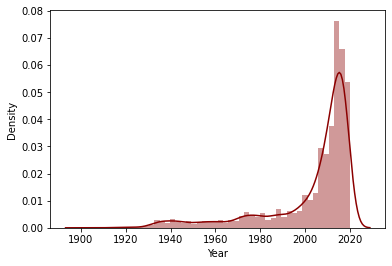

In [124]:
sns.distplot(df['Year'], color='darkred')

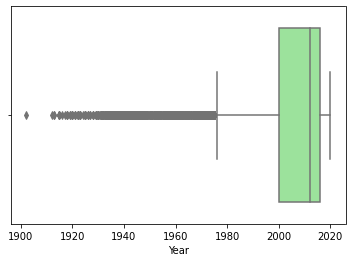

In [125]:
sns.boxplot(x=df['Year'], color='lightgreen')

The above graph depicts the distribution of movies across years. All these OTT platforms consist of movies released between the years 1902 and 2020.There are negligibly less number of movies released before 1920. On the other hand, most of the movies in the OTT platforms have been released between the years 2000 and 2020. This is because all of these OTT platforms emerged in this interval. Also, we can infer that these OTT platforms have acquired digital streaming rights of many movies released in the interval 2010 and 2020.

In [126]:
# Count of movies in each platform based on Year (2016-2020)

y1 = df[['Year', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']]
ye = y1[df['Year'].isin([2016, 2017, 2018, 2019, 2020])].groupby(by='Year').sum()
ye

,Netflix,Hulu,Prime Video,Disney+
Year,,,,
2016,444.0,62,730,17
2017,569.0,124,763,22
2018,560.0,158,625,16
2019,428.0,104,172,23
2020,104.0,6,31,9


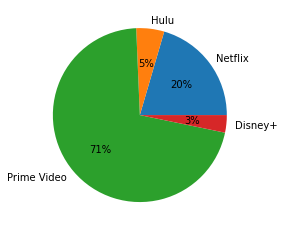

In [127]:
# To check the number of movies in each platform

plt.pie(x=[df['Netflix'].value_counts()[1], df['Hulu'].value_counts()[1], df['Prime Video'].value_counts()[1], df['Disney+'].value_counts()[1]],
        labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+'], 
        autopct = '%.0f%%')
#plt.style.use('default')
plt.show()

Most of the movies in the dataset are streaming in Prime Video followed by Netflix, Hulu and Disney+

In [128]:
# Top 10 languages based on movie count

a = df['Language'].values
l=[]
for i in a:
  l.extend(list(str(i).split(",")))

d={}
for i in l:
  if i not in d.keys():
    d[i]=1
  else:
    d[i]+=1

s = pd.Series(index=d.keys(), data = d.values())
s.drop(index='nan', inplace=True)
s.sort_values(ascending=False, inplace = True)

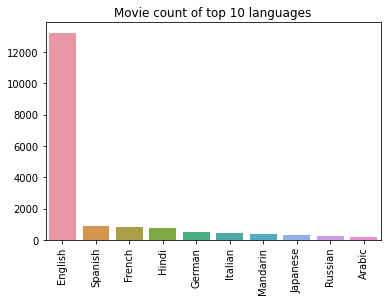

In [129]:
sns.set_palette("flare")
sns.barplot(x=s.index[:10], y=s.values[:10])
plt.xticks(rotation=90)
plt.title("Movie count of top 10 languages")
plt.show()

From the above graph, we can infer that 12,000+ movies are available in English in these OTT platforms. All of these OTT platforms concentrate more on English movies to seek attention of viewers globally.

In [151]:
# To determine the movie count on each OTT platform based on Age

x=pd.DataFrame({'Netflix':df[['Netflix','Age']].value_counts()[1],
                'Hulu':df[['Hulu','Age']].value_counts()[1],
                'Prime Video':df[['Prime Video','Age']].value_counts()[1],
                'Disney+':df[['Disney+','Age']].value_counts()[1]})

In [152]:
x

,Netflix,Hulu,Prime Video,Disney+
13+,382,119,819,40
16+,89,17,226,1
18+,752,290,2612,3
7+,323,109,916,179
all,130,55,406,277


In [153]:
x.rename_axis('Age', inplace=True)
x.reset_index(inplace=True)
x=x.melt(id_vars='Age', var_name='Platform', value_name='movie_count')
x

,Age,Platform,movie_count
0,13+,Netflix,382
1,16+,Netflix,89
2,18+,Netflix,752
3,7+,Netflix,323
4,all,Netflix,130
5,13+,Hulu,119
6,16+,Hulu,17
7,18+,Hulu,290
8,7+,Hulu,109
9,all,Hulu,55


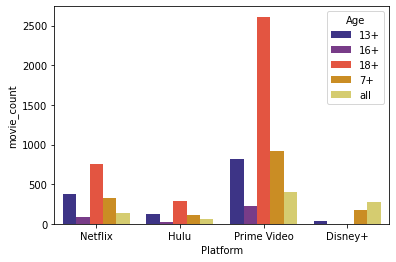

In [154]:
sns.barplot(x=x.Platform, y=x.movie_count, hue=x['Age'], palette='CMRmap')

From the above plot, we can infer that most of these OTT platforms prioritize 18+ movies to captivate viewers of that age group, while Disney+ concentrates more on movies that are appropriate for children.

In [134]:
# To determine the movie count on each platform based on Genre

a = df[['Netflix','Hulu','Prime Video', 'Disney+', 'Genres']]
a=a.drop('Genres', axis=1).join(a['Genres'].str.split(",", expand=True).stack().reset_index(level=1, drop=True).rename("Genres"))
a

,Netflix,Hulu,Prime Video,Disney+,Genres
0,1.0,0,0,0,Action
0,1.0,0,0,0,Adventure
0,1.0,0,0,0,Sci-Fi
0,1.0,0,0,0,Thriller
1,1.0,0,0,0,Action
...,...,...,...,...,...
16741,0.0,0,0,1,Documentary
16742,0.0,0,0,1,Documentary
16743,0.0,0,0,1,Documentary
16743,0.0,0,0,1,Short


In [135]:
g1=a.groupby(by=a['Genres']).sum()

In [136]:
net = g1['Netflix'].sort_values(ascending=False)
hulu = g1['Hulu'].sort_values(ascending=False)
prime = g1['Prime Video'].sort_values(ascending=False)
dis = g1['Disney+'].sort_values(ascending=False)

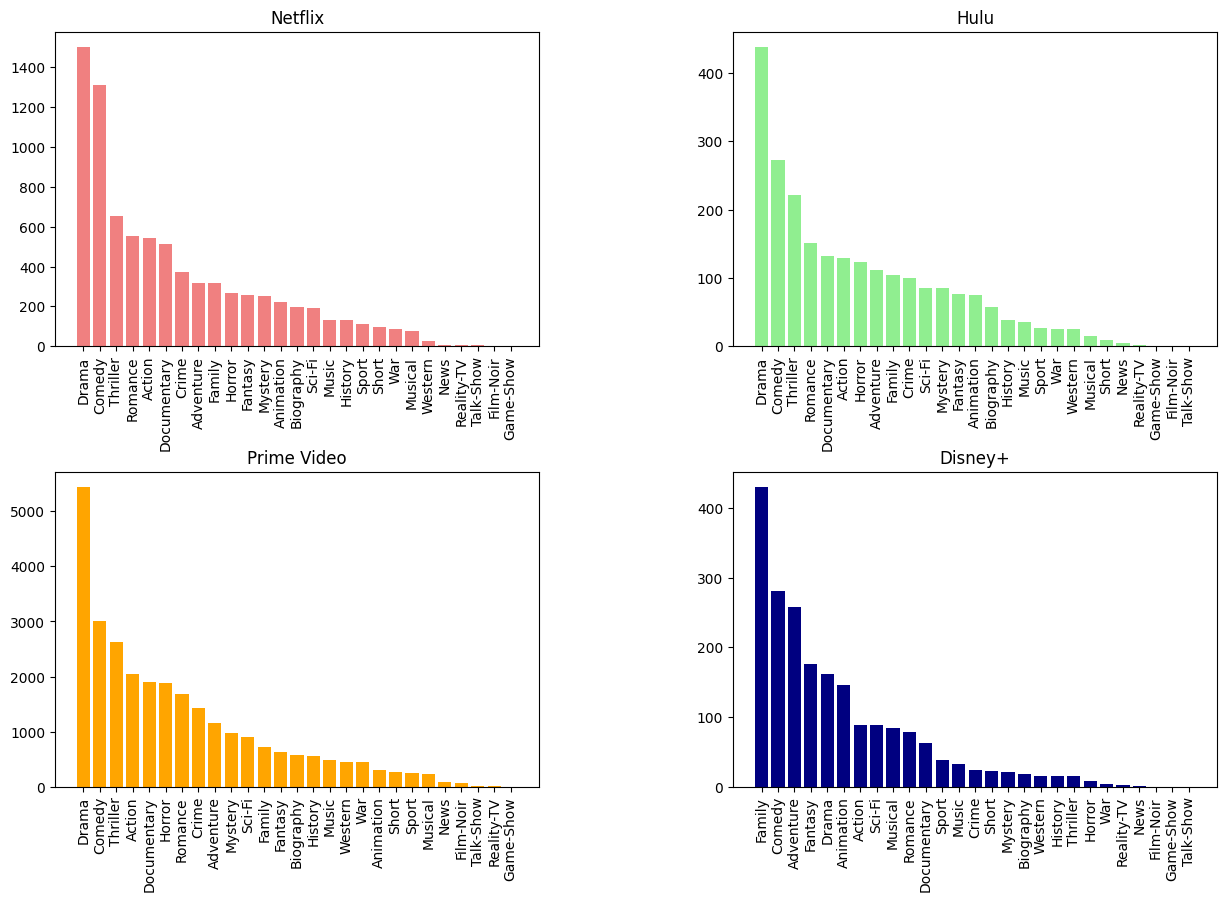

In [137]:
#fig, ax= plt.subplots(2,2, figsize=(10,10), dpi=100)

plt.figure(figsize=(15,10), dpi=100)

plt.subplot(2,2,1)
plt.bar(x=net.index, height=net.values, color='lightcoral')
plt.title('Netflix')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.bar(x=hulu.index, height= hulu.values, color='lightgreen')
plt.title('Hulu')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.bar(x=prime.index, height=prime.values, color='orange')
plt.title('Prime Video')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.bar(x=dis.index, height = dis.values, color='navy')
plt.title('Disney+')
plt.xticks(rotation=90)

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)

plt.show()


The above plots depicts the count of movies in each platform based on genre. It is evident that Netflix, Hulu and Prime Video have large set of movies in 'Drama' genre, while Disney+ has maximum movies in 'Family' genre. It might have prioritized 'Family'-based movies in order to seek attention of larger audience of all age group.

In [143]:
#  Movie count based on countries across the platforms

a = df[['Netflix','Hulu','Prime Video', 'Disney+', 'Country']]
a=a.drop('Country', axis=1).join(a['Country'].str.split(",", expand=True).stack().reset_index(level=1, drop=True).rename("Country"))
a= a.groupby(by='Country').sum()
a

,Netflix,Hulu,Prime Video,Disney+
Country,,,,
Afghanistan,0.0,0,4,0
Albania,1.0,0,4,0
Algeria,0.0,0,4,0
Angola,0.0,0,0,1
Argentina,47.0,6,56,0
...,...,...,...,...
West Germany,4.0,0,66,0
Yemen,0.0,0,1,0
Yugoslavia,0.0,0,13,0


In [140]:
netc = a['Netflix'].sort_values(ascending= False)[:11]
huluc = a['Hulu'].sort_values(ascending= False)[:11]
primec = a['Prime Video'].sort_values(ascending= False)[:11]
disc= a['Disney+'].sort_values(ascending= False)[:11]

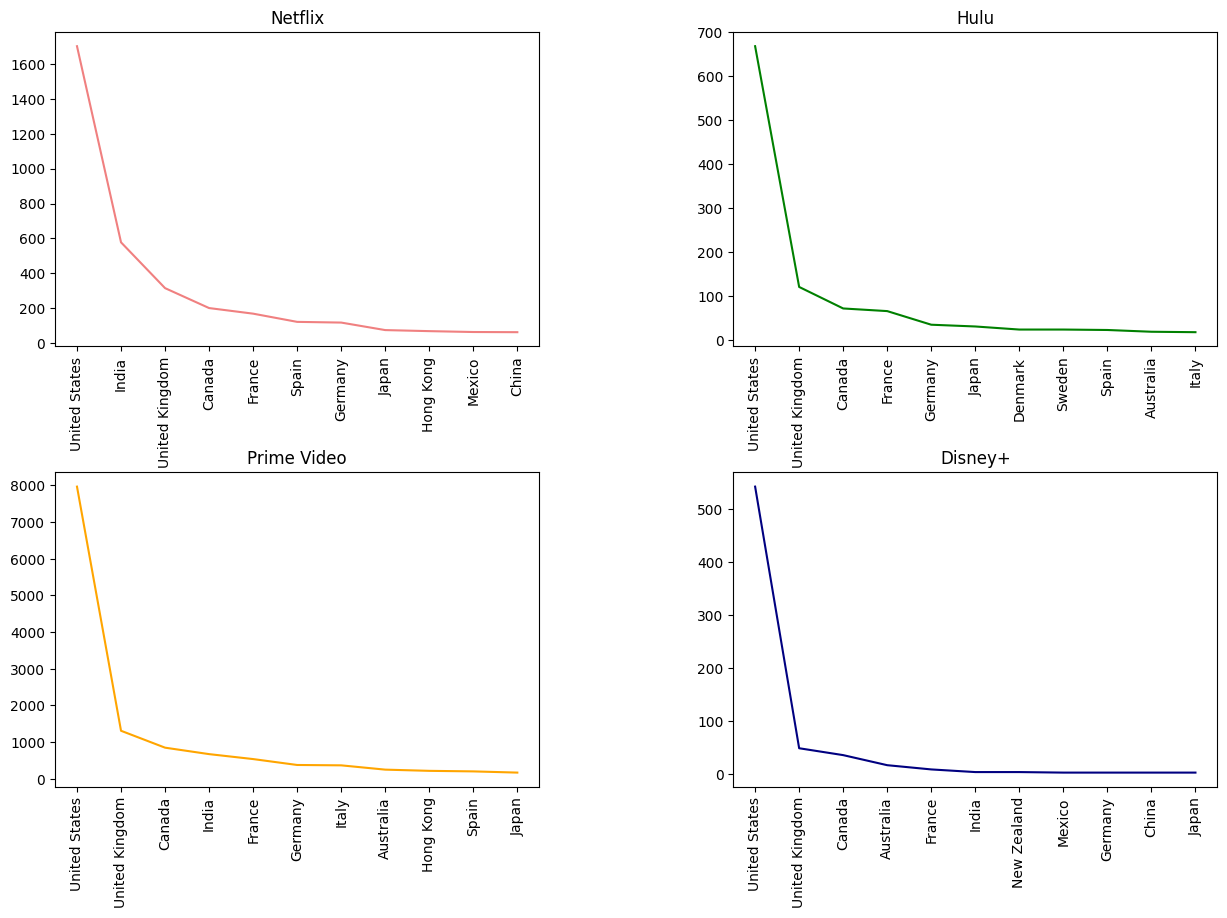

In [141]:
plt.figure(figsize=(15,10), dpi=100)

plt.subplot(2,2,1)
plt.plot(netc.index, netc.values, color='lightcoral')
plt.title('Netflix')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.plot(huluc.index, huluc.values, color='green')
plt.title('Hulu')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.plot(primec.index, primec.values, color='orange')
plt.title('Prime Video')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.plot(disc.index, disc.values, color='navy')
plt.title('Disney+')
plt.xticks(rotation=90)

plt.subplots_adjust(
                    wspace=0.4, 
                    hspace=0.4)

plt.show()


The above plots depict the count of movies in each platform based on the country. All the OTT platforms concentrate more on American movies These platforms might generate higher revenue in US. So, this might prabably be the reason for higher count of American movies. 

In [142]:
# Movie count based on country and Genre across the platforms

coun_gen = df[['Country', 'Genres', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']]
coun_gen = coun_gen.drop('Country', axis=1).join(coun_gen['Country'].str.split(",", expand=True).stack().reset_index(level=1, drop=True).rename("Country"))
coun_gen = coun_gen.drop('Genres', axis=1).join(coun_gen['Genres'].str.split(",", expand=True).stack().reset_index(level=1, drop=True).rename("Genres"))
coun_gen.groupby(by=['Country', 'Genres']).sum()

Netflix  Hulu  Prime Video  Disney+
Country     Genres                                          
Afghanistan Action           0.0     0            2        0
            Documentary      0.0     0           11        0
            Drama            0.0     0            2        0
            History          0.0     0           11        0
            War              0.0     0           11        0
...                          ...   ...          ...      ...
Yugoslavia  War              0.0     0           10        0
Zambia      Drama            0.0     0            2        0
Zimbabwe    Documentary      5.0     0            4        0
            History          0.0     0            4        0
            Music            0.0     0            4        0

[1750 rows x 4 columns]